# Interpret your ML model

[1. What's in a black box?](#black_box)

[2. Different types of interpretation](#types)

[3. Trade-off between Accuracy and Interpretability](#tradeoff)

[4. Feature Importance](#feature_importance)

[5. Dependency plots](#dependency_plots)

[6. Local interpretation](#local)

[7. SHAP](#shap)

[8. Practice! Explaining your ML model 🔍](#practice)

[9. Wrapping up](#wrapping_up)

[10. Great resources to learn more about interpretable ML 📚](#resources)


# <a id='black_box'></a> 1. What's in a black box?

The more companies are interested in using machine learning and big data in their work, the more they care about the interpretability of the models. This is understandable: asking questions and looking for explanations is human. 

We want to know not only "What's the prediction?", but "Why so?" as well. Thus, interpretation of ML models is important and helps us to:

   - Explain individual predictions
   - Understand models' behaviour
   - Detect errors & biases
   - Generate insights about data & create new features
   
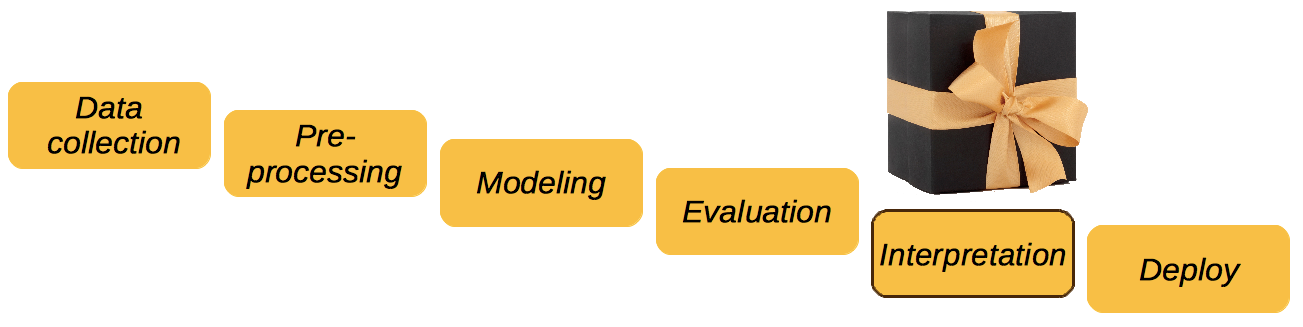

# <a id='types'></a> 2. Different types of interpretation

Model's predictions can be explained in different ways. The choice of media relies on what would be the most appropriate for a given problem.

## <font color='purple'> Visualization
    
For example, visualized interpretations are perfect for explaining the image classifier predictions.    
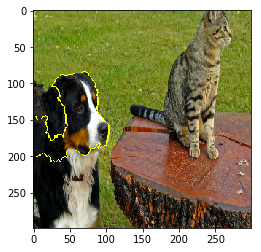

Source: [LIME Tutorial](https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html)

## <font color='purple'> Textual description

A brief text explanations is also an option.    
    
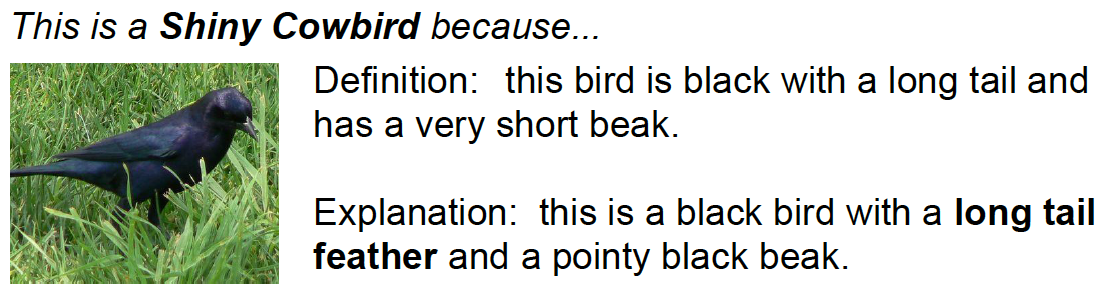
    
Source: [Generating Visual Explanations](https://arxiv.org/pdf/1603.08507.pdf)

## <font color='purple'> Formulae
And sometimes an old, good formula is worth a thousand of words:    

House price = $\$2800 * room + \$10000 * {swimming pool} + \$5000 * garage$

# <a id='tradeoff'></a> 3. Trade-off between Accuracy and Interpretability

The thing is that not all kinds of machine learning models are equally interpretable. As a rule, more accurate and advanced algorithms, e.g. neural networks, are hard to explain. Imagine making sense of all these layers' weights!

Thus, it is a job of a data scientist to:
1. Find a trade-off between accuracy and interpretability.

    One may use a linear regression which predictions are easy to explain. But the price for a high interpretability may be a lower metric as compared to a more complicated boosting.

2. Explain a choice of a particular algorightm to a client.

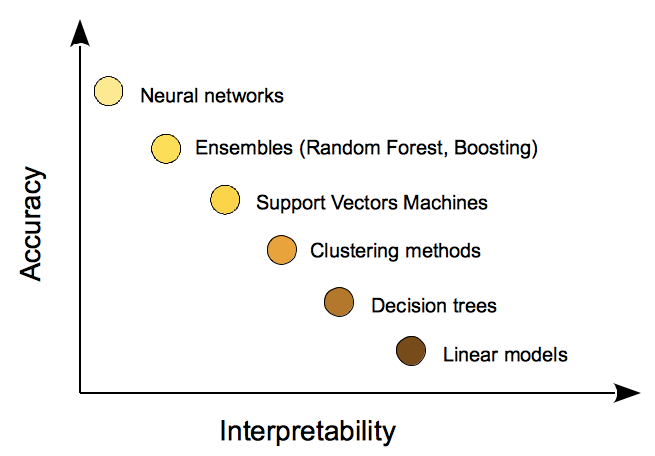


# <a id='feature_importance'></a> 4. Feature importance
Feature importance helps to answer the question "**What features** affect the model's prediction?"

One of the methods used to estimate the importance of features is Permutation importance.

*Idea*: if we permute the values of an important feature, the data won't reflect the real world anymore and the accuracy of the model will go down.

The method work as follows:

- Train the model 
- Mix up all values of the feature `X`. Make a prediction on an updated data.
- Compute $Importance(X) = Accuracy_{actual} - Accuracy_{permutated}$.
- Restore the actual order of the feature's values. Repeat steps 2-3 with a next feature.


**Advantages:**
- Concise global explanation of the model's behaviour.
- Easy to interpret.
- No need to re-train a model again and again.

**Disadvantages:**
- Need the ground truth values for the target.
- Connection to a model's error. It's not always bad, simply not something we need in some cases.

    Sometimes we want to know how much the prediction will change depending on the feature's value without taking into account how much the metric will change.

# <a id='dependency_plots'></a> 5. Dependency plots

Partial Dependency Plots will help you to answer the question "**How** does the feature affect the predictions?"
PDP provides a quick look on the global relationship between the feature and the prediction. The plot below shows that the more money is at one's bank account, the higher the probability of one signing a term deposit during [a bank campaign](http://https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).



Let's look at how this plot is created:
1. Take one sample: a single student, no loans, balance is around \$1000.
2. Increase the latter feature up to 5000.
3. Make a prediction on an updated sample.
4. What is the model output if `balance==10`? And so on.
5. Moving along the x axis, from smaller to larger values, plot the resulting predictions on the y axis.

Now, we considered only one sample. To create a PDP, we need to repeat this procedure for all the samples, i.e. all the rows in our dataset, and then draw the average prediction.

**Advantages:**
- Easy to interpret
- Enables the interpretation of causality

**Disadvantages:**
- One plot can give you the analysis of only one or two features. Plots with more features would be difficult for humans to comprehend.
- An assumption of the independent features. However, this assumption is often violated in real life. 

    Why is this a problem? Imagine that we want to draw a PDP for the data with correlated features. While we change the values of one feature, the values of the related feature stay the same. As a result, we can get unrealistic data points. For instance, we are interested in the feature `Weight`, but the dataset also contains such a feature as `Height`. As we change the value of `Weight`, the value of `Height` is fixed so we can end up having a sample with `Weight==200 kg` and `Height==150 cm`.
- Opposite effects can cancel out the feature's impact.
    
    Imagine that a half of the values of a particular feature is positively correlated with the target: the higher the value, the higher the model's outcome. On the other hand, a half of the values is negatively correlated with the target: the lower the feature's value, the higher the prediction. In this case, a PDP may be a horizontal line since the positive effects got cancelled out by the negative ones.


# <a id='local'></a> 6. Local interpretation

For now, we have considered two methods of global interpretation: feature importance and dependecy plots. These approaches help us to explain our model's behaviour, well, at a global level which is surely nice. However, we often need to explain a particular prediction for an individual sample. To achieve this goal, we may turn to local interpretation. One technique that can be used here is [LIME, Local Interpretable Model-agnostic Explanations](https://github.com/marcotcr/lime) 

The idea is as follows: instead of interpreting predictions of the black box we have at hand, we create a local surrogate model which is interpretable by its nature (e.g. a linear regression or a decision tree), use it to predict on an interesting data point and finally explain the prediction.

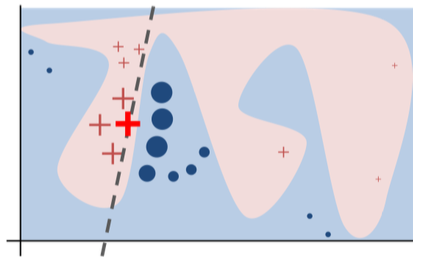

On the picture above, the prediction to explain is a big red cross. Blue and pink areas represent the complex decision function of the black box model. Surely, this cannot be approximated by a linear model. However, as we see, the dashed line that represents the learned explanation is locally faithful.

Source: [Why Should I Trust You?](https://arxiv.org/pdf/1602.04938.pdf)

**Advantages:**
- Concise and clear explanations.
- Compatible with most of data types: texts, images, tabular data.
- The speed of computation as we focus on one sample at a time.

**Disadvantages:**
- Only linear models are used to approximate the model's local behaviour.
- No global explanations.

# <a id='shap'></a> 7. SHAP

[SHapley Additive exPlantions (SHAP)](https://github.com/slundberg/shap) is an method based on the concept of the Shapley values from the game theory.

Idea: a feature is a "player", a prediction is a "gain". Then the Shapley value is the contribution of a feature averaged over all possible combinations of a "team":


$$\phi_i(v) = \sum_{ S \subseteq N \setminus \lbrace i \rbrace } {{|S| ! ( N - |S| - 1 )!} \over {N!}} ( v( S \cup \lbrace i \rbrace) - v( S ))$$


$N$ - all players.

$S$ - the "team" of $N$ players.

$v(S)$ - the gain of $S$.

$v( S \cup \lbrace i \rbrace) - v(S)$ - the "player's" contribution when joining $S$.

**Advantages:**
- Global and local interpretation.
- Intuitively clear local explanations: the prediction is represented as a game outcome where the features are the team players.

**Disadvantages:**
- Shap returns only one value for each feature, not an interpretable model as LIME does.
- Slow when creating a global interpretation.


# <a id='practice'></a> 8. Practice! Explaining your ML model 🔍

## Loading data

Our __task__ is to predict whether a person earns more than 50,000$ a year.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pdpbox, lime, shap, eli5
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

%matplotlib inline

In [2]:
# data source: https://www.kaggle.com/uciml/adult-census-income
data = pd.read_csv('adult.csv')
data.shape

(32561, 15)

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Preprocessing and Modeling

Since we are going to tackle this case as a classification problem, let's encode the variable `income` into a binary target.

In [5]:
data['target']=data['income'].map({'<=50K':0,'>50K':1})
data.drop("income",axis=1,inplace=True)
data['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [6]:
# Let's drop "education.num" feature. We will use one-hot encoding instead.
data.drop("education.num",axis=1,inplace=True)

In [7]:
# Since this example is for educational purposes, we'll also drop 'native-country' feature to decrease our data dimensionality.
data.drop('native.country',axis=1,inplace=True)

In [8]:
# Now we will encode categorical features using one-hot encoding, i.e. each category will now be represented by a separate column
# containing only 0 and 1, depending on whether this category is relevant in a sample (row in our data) 
data=pd.get_dummies(data, drop_first = True)

In [9]:
data.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,90,77053,0,4356,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,82,132870,0,4356,18,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,66,186061,0,4356,40,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,54,140359,0,3900,40,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,41,264663,0,3900,40,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


Let's split our data into train and test in proportions 70/30. We will also fix ```random_state``` for reproducability and use `stratify` to preserve the same class distribution.

In [10]:
y = data['target'].values
features = [col for col in data.columns if col not in ['target']]
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22792, 58) (22792,)
(9769, 58) (9769,)


In [11]:
model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))

Accuracy: 0.86
Recall: 0.62


### Explore what features are important for the model. 

Here we are going to use permutation feature importance.

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())

Weight,Feature
0.0459 ± 0.0033,capital.gain
0.0236 ± 0.0036,marital.status_Married-civ-spouse
0.0131 ± 0.0034,age
0.0077 ± 0.0010,capital.loss
0.0075 ± 0.0023,education_Bachelors
0.0069 ± 0.0035,hours.per.week
0.0057 ± 0.0025,occupation_Prof-specialty
0.0046 ± 0.0013,occupation_Exec-managerial
0.0043 ± 0.0024,marital.status_Never-married
0.0024 ± 0.0030,sex_Male


Ok, looks like the most important feature in our case if `capital.gain`. Let's see **how** exactly it influences the target.

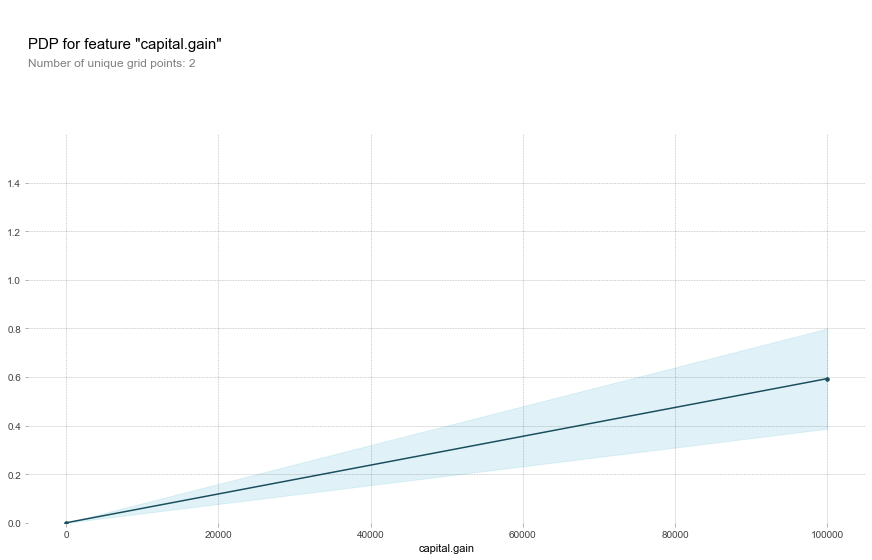

In [13]:
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'capital.gain'
capital_gain_pdp = pdp.pdp_isolate(model=model, dataset=X_test, 
                                   model_features=X_test.columns, feature=feat_name)

pdp.pdp_plot(capital_gain_pdp, feat_name)
plt.show()

Unsurprisingly, our model show that there's a positive correlation: people who have some capital-gains are more probable to earn more than $50,000.

The more a person works, the more money they make. Kind of a logical thought, right? But let's check if that's true.

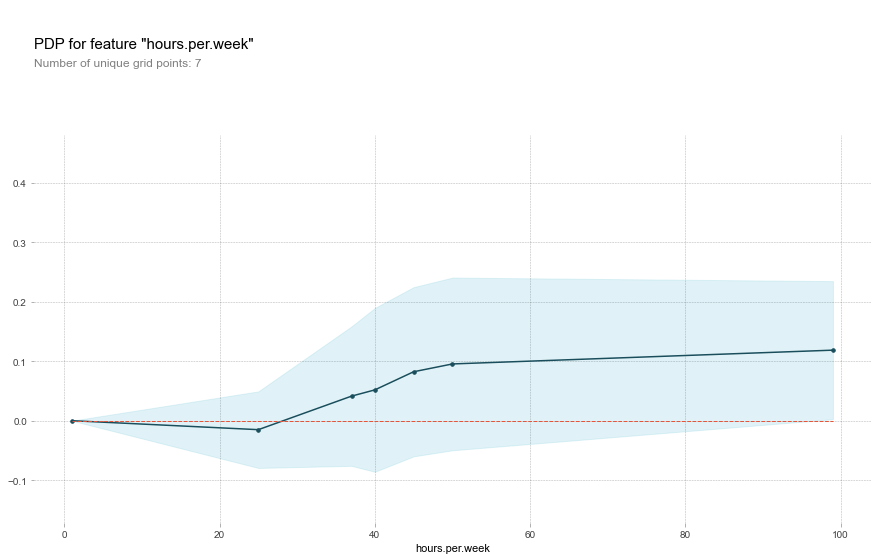

In [14]:
feat_name = 'hours.per.week'

hours_per_week_pdp = pdp.pdp_isolate(model=model, dataset=X_test, 
                                   model_features=X_test.columns, feature=feat_name)

pdp.pdp_plot(hours_per_week_pdp, feat_name)
plt.show()

Well, actually this logic is totally wrong. The plots shows us the following:
- If a person works <20 hours a week, the chance of gaining \$50K is around a zero. That's plausible because it's probably a part-time job.
- The possibility of earning more than \$50K is increasing linearly when working from 20 up to 40 hours a week.
- However, working more hours won't make you richer on general. This could be explained by the fact that those extra hours (over standard 40) probably represent some side hastle which may be not stable. Another scenario might be that a person has several low-paying part-time jobs.  

Now let's see how we can explain individual predictions of our model. In order to do that we'll find a person earning more than \$50K from the test set and draw some plots with SHAP and LIME.

In [15]:
# check the target. 1? perfect!
y_test[69]

1

In [16]:
# taking a quick look on a sample
pd.DataFrame(X_test.iloc[69]).T

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
2389,46,243190,7688,0,40,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
# First, create a prediction on this sample
row = X_test.iloc[69]
to_predict = row.values.reshape(1, -1)

model.predict_proba(to_predict)

array([[0.07, 0.93]])

Our model predicts that this person earns more than \$50K a year with the probabiltiy over 90%. Let's find out what affected this prediction.

In [18]:
import shap 
# create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate Shap values
shap_values = explainer.shap_values(row)

In [19]:
# draw a plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], row)

Let's read the plot above:
- Basically, the base value is the mean of the model output over the train set. This means that accoding to our model, the probability of earning more than \$50K over is on average 24%.
- The red arrows show us **what** features and **how much** "pushed" the probability for a given person to earn more than people on general. Here the capital-gain amounts for more than \$7K. Quite probable this person earns at least 50 grand a year. 
- The opposite goes for the blue arrows. Ouch, it seems like our model identified one of the biases of the job market: women earn less than men somehow. Since the model was trained on this kind of data, it identifies one's gender as one of the features affecting one's income.


Let's also create a local explanation for that prediction using LIME:

In [20]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_test.columns,
                                                    discretize_continuous=True)

exp = explainer.explain_instance(row, model.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

Looks about right: capital-gain is identified as the most important feature for predicting the target as `1`.


# <a id='wrapping_up'></a> 9. Wrapping up

Hope that this notebook was useful and now you know how to turn your black box into a explainable and trustworthy model. Cheers!

**Bonus:** a quick (but totally not comprehensive!) overview of some tools for interpretable ML.

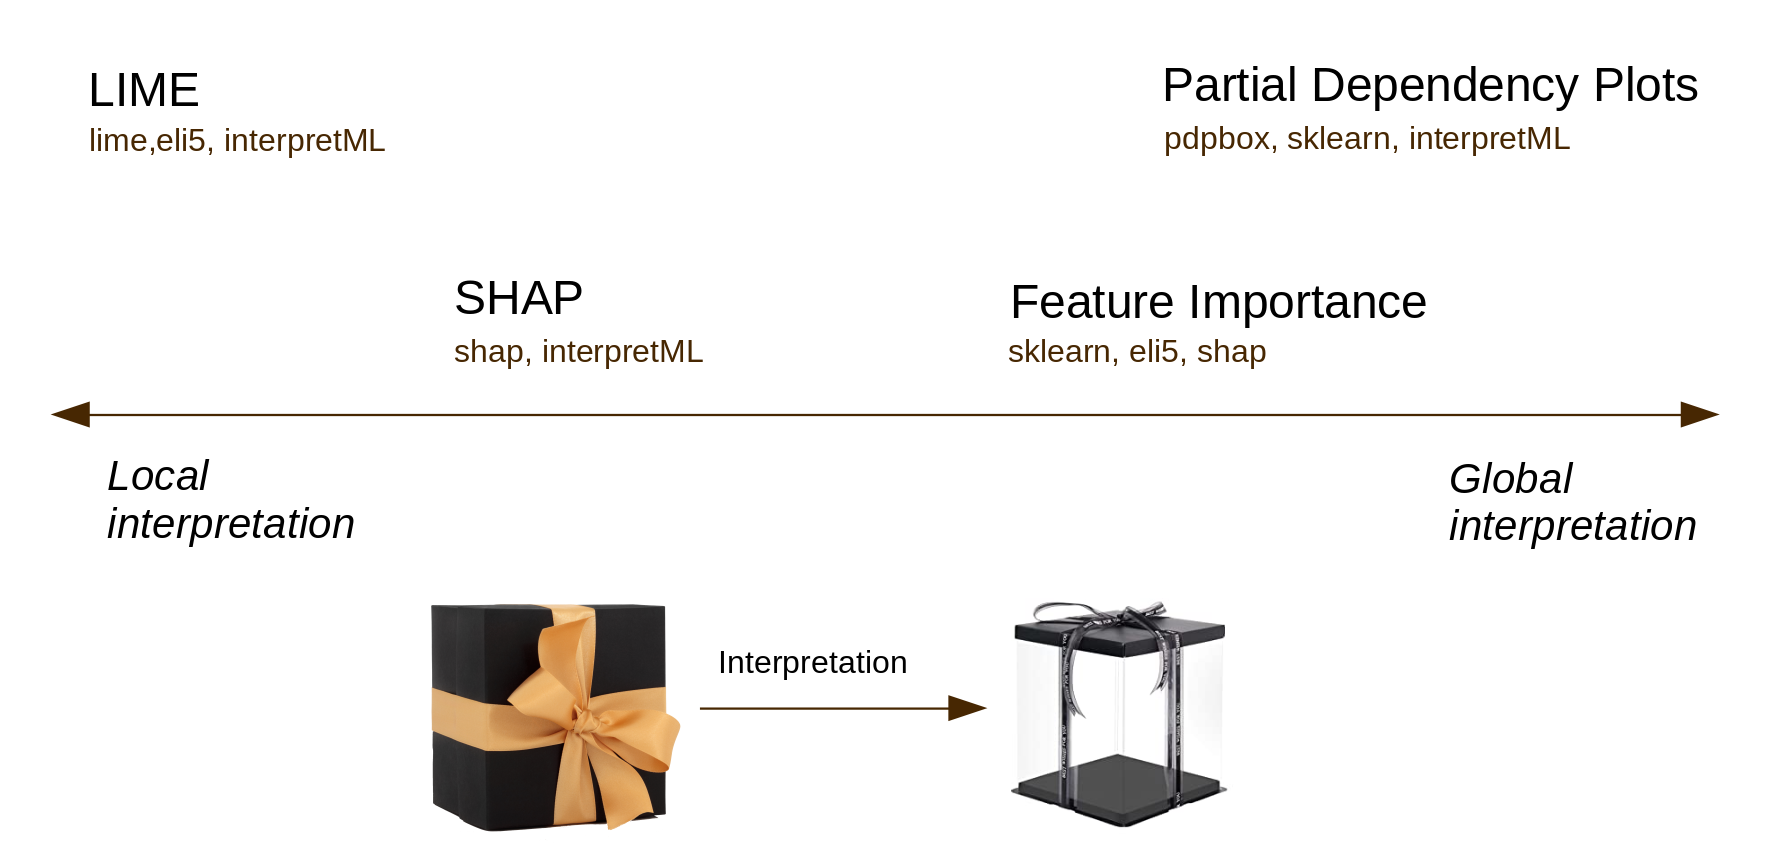

# <a id='resources'></a> 10. Great resources to learn more about interpretable ML 📚

- [Ch. Molnar, Interpretable ML book](https://christophm.github.io/interpretable-ml-book/)
- [Kaggle course by Dan Becker: Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
- [LIME repo](https://github.com/marcotcr/lime)
- [Shap repo](https://github.com/slundberg/shap)
- [InterpretML: Open-source project by Microsoft](https://github.com/interpretml/interpret)
